https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('data/temps.csv')
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


### 2. Lidia con las variables categóricas del dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [6]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [7]:
# unicos
df["week"].unique()

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs'], dtype=object)

In [8]:
week_dict = {"Mon":0, "Tues":1, "Wed":2, "Thurs":3, "Fri":4, "Sat":5, "Sun":6}
df["week"] = df["week"].map(week_dict)

In [9]:
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,4,45,45,45.6,45,43,50,44,29
1,2016,1,2,5,44,45,45.7,44,41,50,44,61
2,2016,1,3,6,45,44,45.8,41,43,46,47,56
3,2016,1,4,0,44,41,45.9,40,44,48,46,53
4,2016,1,5,1,41,40,46.0,44,46,46,46,41


In [10]:
# clases

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [12]:
# dummies
pd.get_dummies(df["week"])

,0,1,2,3,4,5,6
0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
343,0,1,0,0,0,0,0
344,0,0,1,0,0,0,0
345,0,0,0,1,0,0,0
346,0,0,0,0,1,0,0


In [13]:
# dummies
df["week"].get_dummies()

AttributeError: 'Series' object has no attribute 'get_dummies'

In [ ]:
df = pd.concat([df, pd.get_dummies(df["week"])], axis=1).drop("week", axis=1)

In [ ]:
# 'Mon':0,'Tues':1,'Wed':2,'Thurs':3,'Fri':4,'Sat':5,'Sun':6

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    int64  
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 32.8 KB


In [15]:
# agurpar por mes y quedarse con la media de la columna temp_1
df.groupby("month")["temp_1"].mean()

month
1     49.677419
2     54.115385
3     56.483871
4     66.433333
5     68.838710
6     73.233333
7     76.225806
8     77.947368
9     70.428571
10    63.900000
11    56.966667
12    43.741935
Name: temp_1, dtype: float64

In [16]:
# merge del dataframe anterior con el original

In [17]:
import seaborn as sns

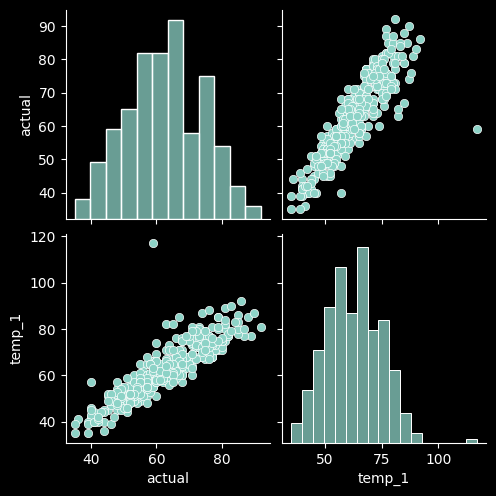

In [18]:
import seaborn as sns
sns.pairplot(df[["actual","temp_1"]])

In [19]:
import matplotlib.pyplot as plt

In [20]:
df.drop(columns=["year"], inplace=True)

<AxesSubplot:>

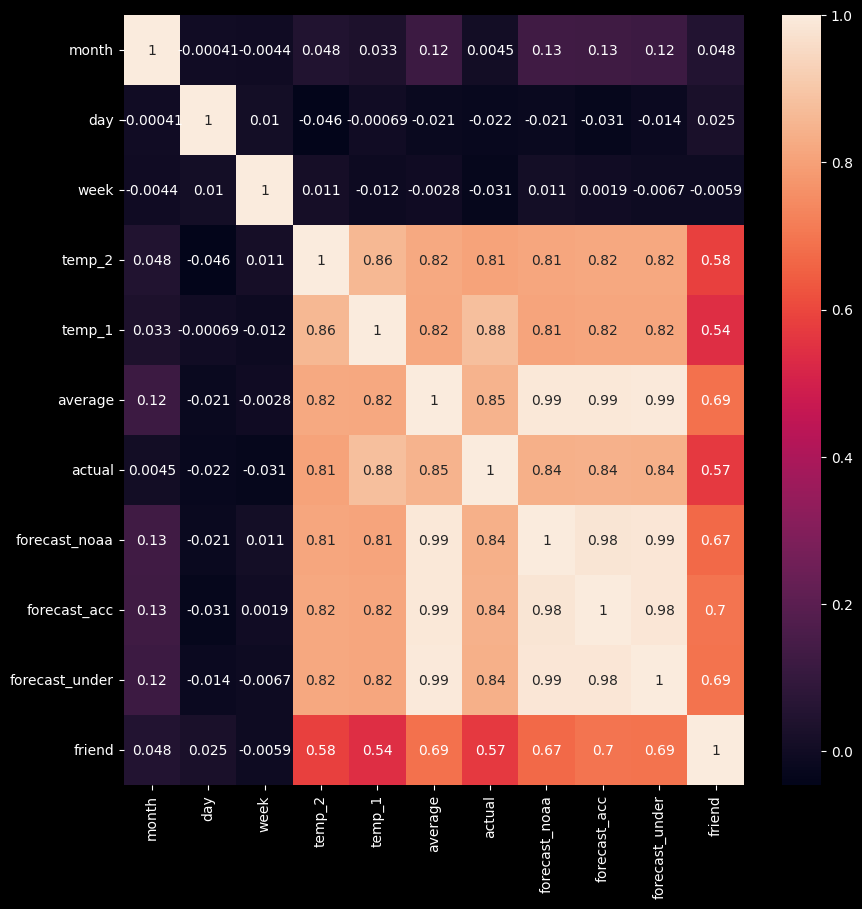

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

### 3. Divide en train y test

In [22]:
X = df.drop(columns=['actual'])
y = df['actual']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Entrena el modelo


In [24]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [25]:
X_train.columns

Index(['month', 'day', 'week', 'temp_2', 'temp_1', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend'],
      dtype='object')

In [26]:
X_train.columns

Index(['month', 'day', 'week', 'temp_2', 'temp_1', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend'],
      dtype='object')

In [27]:
feat_imp = dtr.feature_importances_

In [28]:
feat_imp_df = pd.DataFrame({'features':X_train.columns, 'importances':feat_imp}).sort_values('importances', ascending=False)

In [29]:
feat_imp_df

,features,importances
4,temp_1,0.758399
5,average,0.096017
7,forecast_acc,0.026442
1,day,0.023488
8,forecast_under,0.020030
2,week,0.018376
3,temp_2,0.018165
0,month,0.013274
6,forecast_noaa,0.013266
9,friend,0.012544


In [30]:
y_pred = dtr.predict(X_test)
y_pred

array([80., 64., 52., 60., 72., 76., 73., 73., 68., 65., 62., 67., 35.,
       61., 68., 55., 58., 57., 56., 71., 63., 55., 70., 59., 63., 48.,
       71., 50., 62., 77., 71., 64., 55., 90., 73., 60., 51., 57., 67.,
       45., 77., 60., 81., 39., 59., 89., 54., 79., 51., 40., 45., 40.,
       63., 66., 74., 60., 55., 57., 51., 53., 63., 49., 57., 71., 63.,
       61., 76., 67., 80., 41.])

### 5. Evaluación de tu modelo
Calcula el coeficiente de determinación. 

Calcula el MAE, MAPE, MSE y RMSE.

In [31]:
y_pred

array([80., 64., 52., 60., 72., 76., 73., 73., 68., 65., 62., 67., 35.,
       61., 68., 55., 58., 57., 56., 71., 63., 55., 70., 59., 63., 48.,
       71., 50., 62., 77., 71., 64., 55., 90., 73., 60., 51., 57., 67.,
       45., 77., 60., 81., 39., 59., 89., 54., 79., 51., 40., 45., 40.,
       63., 66., 74., 60., 55., 57., 51., 53., 63., 49., 57., 71., 63.,
       61., 76., 67., 80., 41.])

In [32]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.6905322092873907
MAE 4.785714285714286
MAPE 0.0751906600408145
MSE 43.27142857142857
RMSE 6.578102201351737


### 6. Representa el árbol de decision

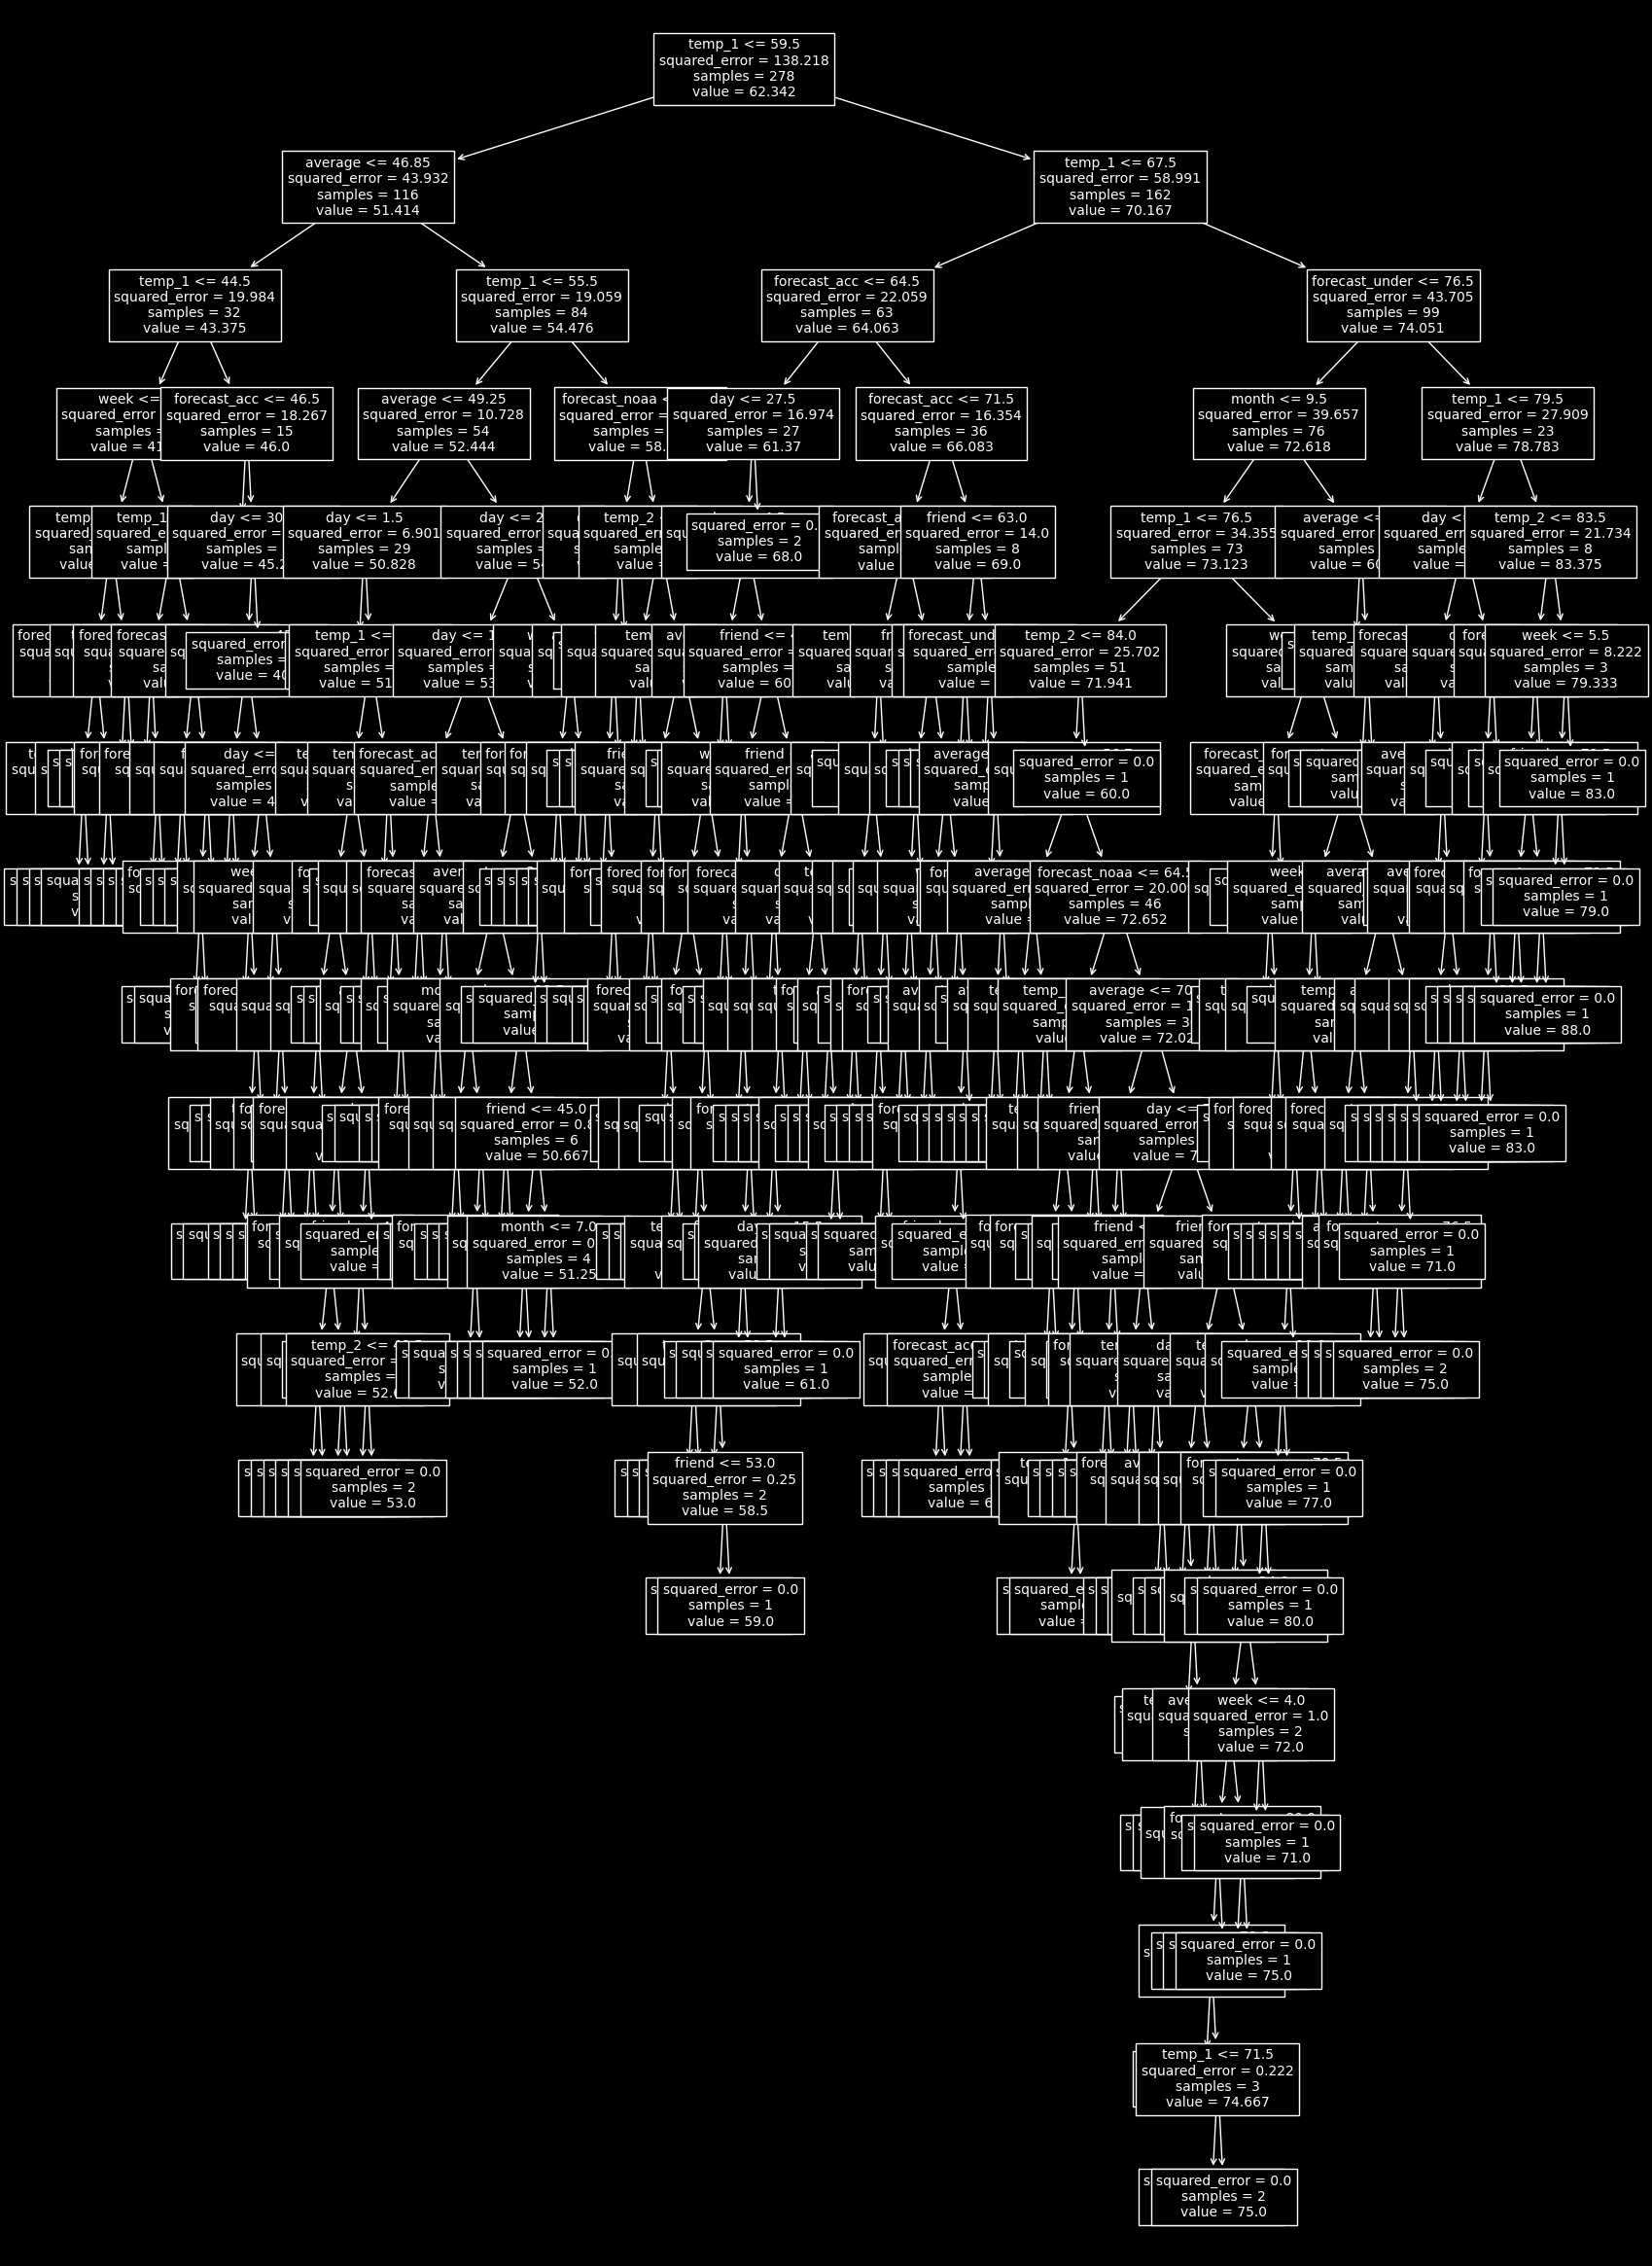

In [33]:
plt.figure(figsize=(20,30))

plot_tree(dtr, feature_names = X_train.columns, class_names = 'actual', fontsize=10); #max_depth cambia la profundidad de la visualización

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [34]:
dtr_3 = DecisionTreeRegressor(max_depth=3)
dtr_3.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

### 8. Vuelve a evaluar tu modelo

In [35]:
y_pred = dtr_3.predict(X_test)
print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.7608677663462975
MAE 4.424444494299118
MAPE 0.06938377135428464
MSE 33.43673777437395
RMSE 5.782450844959596


### 9. Vuelve a representar su árbol

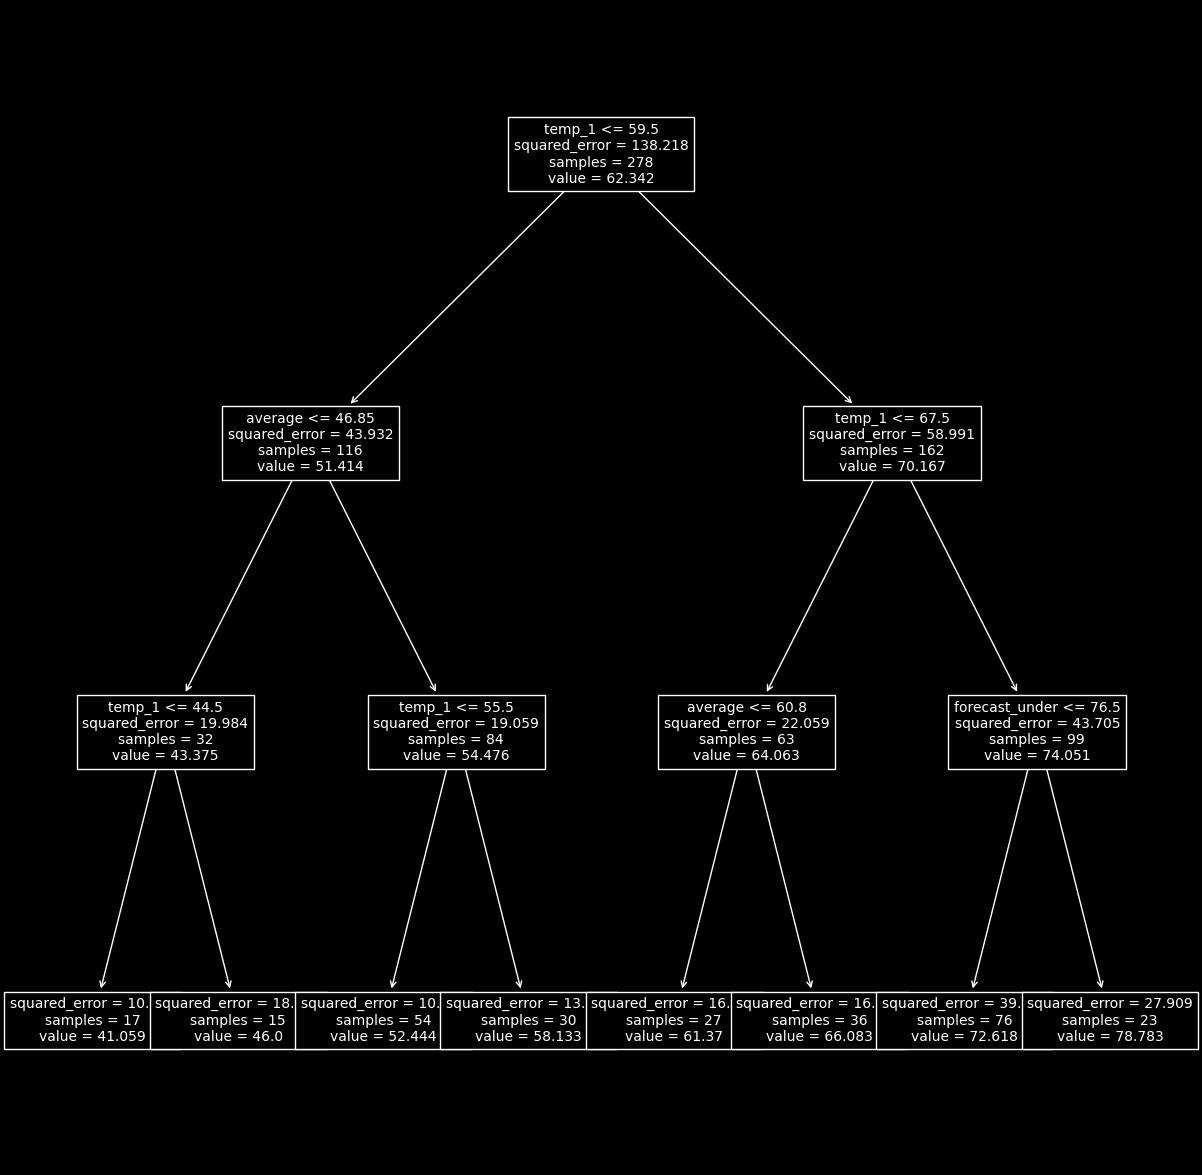

In [36]:
plt.figure(figsize=(15,15))

plot_tree(dtr_3, feature_names = X_train.columns, class_names = 'actual', fontsize=10); #max_depth cambia la profundidad de la visualización

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [37]:
dtr_3.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.88020751,
       0.09902152, 0.        , 0.        , 0.02077097, 0.        ])

In [38]:
X_train.columns

Index(['month', 'day', 'week', 'temp_2', 'temp_1', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend'],
      dtype='object')

In [39]:
pd.DataFrame({'features':X_train.columns, 'importances':dtr_3.feature_importances_}).sort_values('importances', ascending=False)

,features,importances
4,temp_1,0.880208
5,average,0.099022
8,forecast_under,0.020771
0,month,0.000000
1,day,0.000000
2,week,0.000000
3,temp_2,0.000000
6,forecast_noaa,0.000000
7,forecast_acc,0.000000
9,friend,0.000000


In [40]:
X_train, X_test, y_train, y_test = train_test_split(df[['temp_1','average','forecast_under']], df['actual'], test_size=0.2, random_state=42)

In [41]:
dtr_3 = DecisionTreeRegressor(max_depth=3)
dtr_3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [42]:
print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.7608677663462975
MAE 4.424444494299118
MAPE 0.06938377135428464
MSE 33.43673777437395
RMSE 5.782450844959596


### 11. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día no va a hacer una temperatura máxima a 15ºC

In [47]:
df["temp_class"] = np.where(df['actual'] < 59, 0, 1)
df[["actual","temp_class"]].head()

,actual,temp_class
0,45,0
1,44,0
2,41,0
3,40,0
4,44,0


,actual,target_clas
0,45,0
1,44,0
2,41,0
3,40,0
4,44,0


<AxesSubplot:>

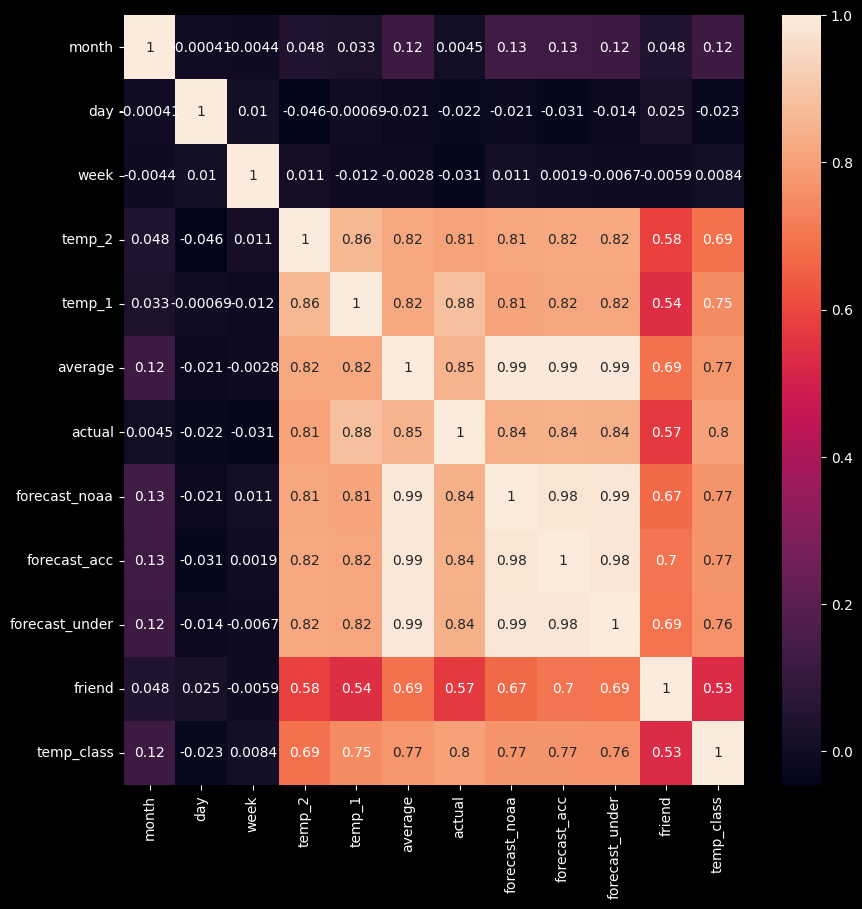

In [48]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [50]:
df['temp_class'].value_counts()

1    215
0    133
Name: temp_class, dtype: int64

In [53]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['month','day','week','actual','temp_class']), df['temp_class'], test_size=0.2, random_state=42)

In [54]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [55]:
X_train.columns

Index(['temp_2', 'temp_1', 'average', 'forecast_noaa', 'forecast_acc',
       'forecast_under', 'friend'],
      dtype='object')

In [56]:
dtc.feature_importances_

array([0.        , 0.85070595, 0.01159979, 0.02433765, 0.06450213,
       0.        , 0.04885447])

In [57]:
feat_perf = pd.DataFrame({'features':X_train.columns, 'importances':dtc.feature_importances_}).sort_values('importances', ascending=False)

In [59]:
feat_perf

,features,importances
1,temp_1,0.850706
4,forecast_acc,0.064502
6,friend,0.048854
3,forecast_noaa,0.024338
2,average,0.011600
0,temp_2,0.000000
5,forecast_under,0.000000


In [60]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,dtc.predict(X_test))

0.9

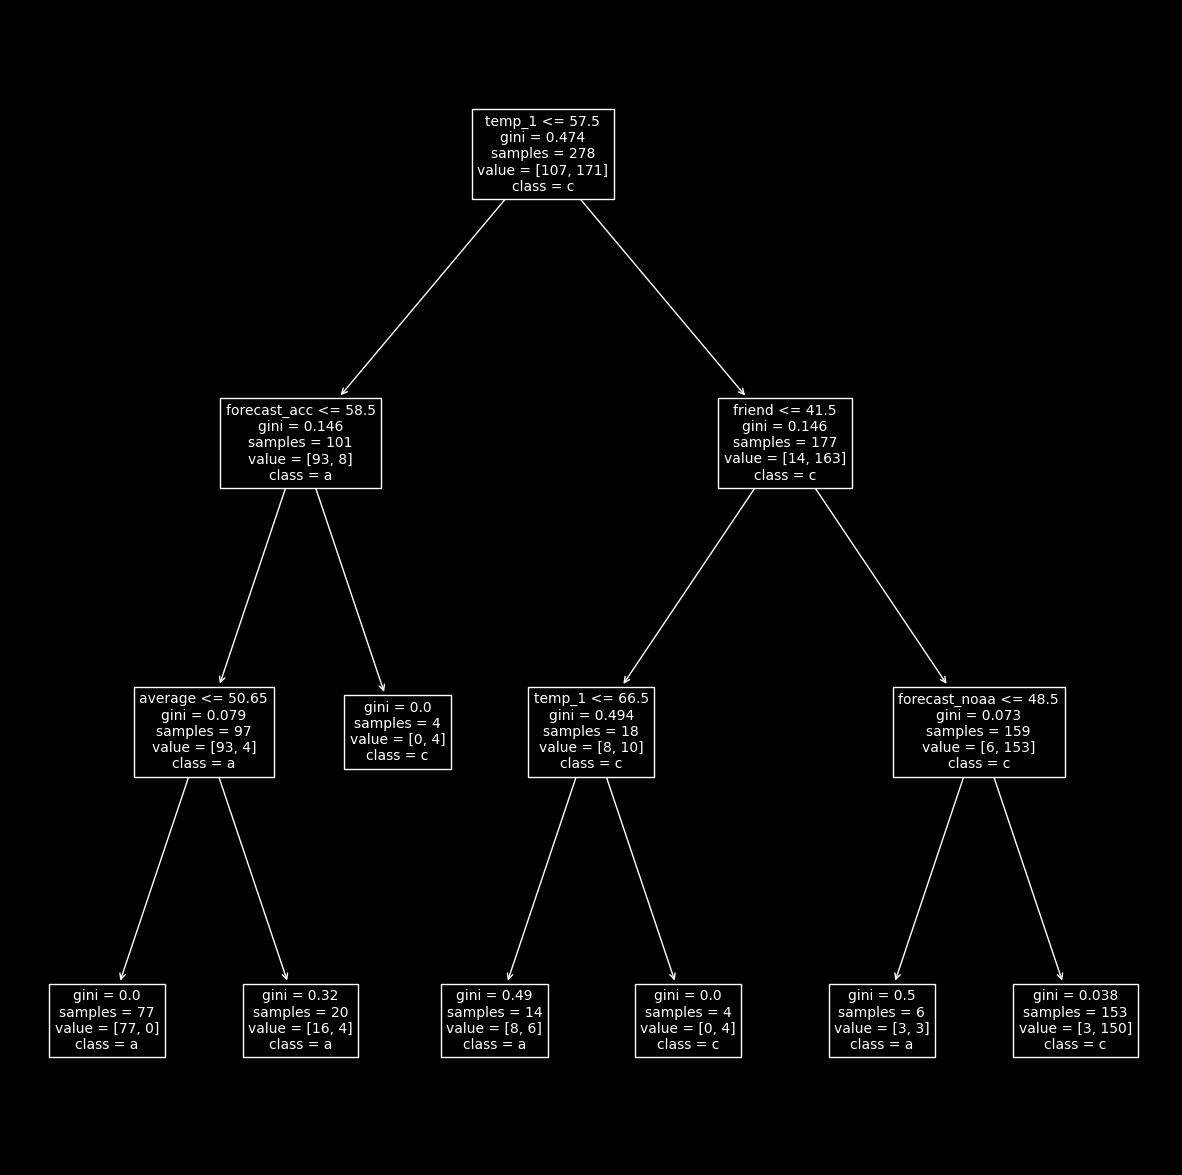

In [61]:
plt.figure(figsize=(15,15))

plot_tree(dtc, feature_names = X_train.columns, class_names = 'actual', fontsize=10); #max_depth cambia la profundidad de la visualización

In [62]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

accuracy_score(y_test,lr.predict(X_test))

c:\Users\Joan Oliver\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9857142857142858

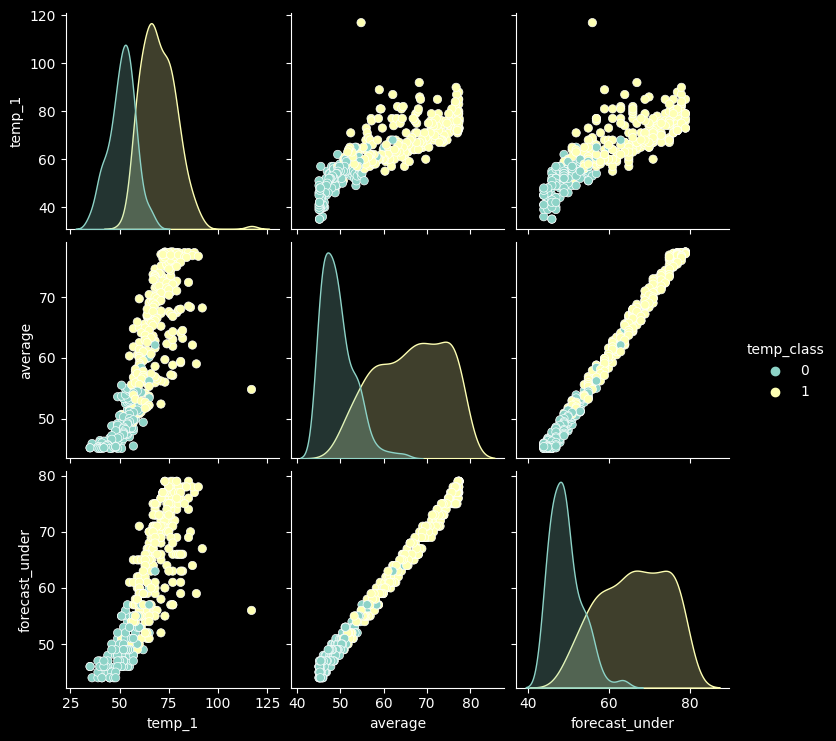

In [65]:
sns.pairplot(df[['temp_1','average','forecast_under','temp_class']], hue='temp_class')